## A3C 
- Asynchronous Advantage Actor -Critic
- Actor : Policy
- Critic : Value
- Advantage = G- V(s)

## Policy Gradient Review

\begin{equation*}
\pi(a|s,\theta_p) = NeuralNet(input:s,weight:\theta_p)\\
V(a|s,\theta_v) = NeuralNet(input:s,weight:\theta_v)
\end{equation*}

- For policy loss, backwards from policy gradient, For Value loss, use squared error
\begin{equation*}
L_p = -(G- V(s))log\pi(a|s,\theta_p)\\
L_v = (G-V(s,\theta_v))^2
\end{equation*}


- Pseudocode
\begin{equation*}
\theta_p = \theta_p - learningrate* dL_p/d\theta_p \\
\theta_v = \theta_v - learningrate* dL_v/d\theta_v
\end{equation*}


- N-Step return 
- instead of using TD(0), we use the N-step return
\begin{equation*}
V(s)= r + \gamma r' + \gamma^2 r'' + \gamma^3 V(s''')
\end{equation*}


- Entropy Regularization
- Definition of entropy
\begin{equation*}
H = - \sum_{k=1}^n \pi_k log\pi_k
\end{equation*}

- New loss (C: regularization constant)
\begin{equation*}
L_p'= L_p +CH
\end{equation*}


![](https://cn.bing.com/th?id=OIP.TlKyrDc2rVlD0tNkkderjAHaGs&pid=Api&rs=1&p=0)

- A3C simply achieves stability using a different method(parallel agents)

## Review of MDPs

MDP is a collection of 5 things  

- states
- actions
- rewards
- state trasition probabilities
- discount factor(gamma)

### Markov Property

$p[s(t+1),r(t+1)|s(t),a(t),...,s(1),a(1)] $ = $p[s(t+1),r(t+1)|s(t),a(t)] $

### Discount Factor

$G(t) = \sum_{\tau = 0}^{\infty}\gamma^{\tau}R(t+\tau+1)$

### State value and state action value

$V_{\pi}(s) = E_{\pi}[G(t)|S_{t}=s]$  
$Q_{\pi}(s,a) = E_{\pi}[G(t)|S_{t}=s,A_{t}=a]$

$\pi(s) = argmax_{a}{(Q(s,a))}$

## Dynamic Programming

$V_{\pi}(s) = \sum_{a}^{}\pi(a|s)\sum_{s'}^{}\sum_{r}^{}p(s',r|s,a)(r+\gamma V_{\pi}(s'))$  

![](https://lilianweng.github.io/lil-log/assets/images/TD_MC_DP_backups.png)

### Iterative Policy Evaluation
- prediction problem: given a policy , find the value function

### Policy Iteration

```python
while not converged:
    step1) policy evaluation of current policy
    step2) policy improvement(take the argmax Q(s,a))
```    

### Value Iteration

- Q-learning

$V_{k+1}(s) = max_{a}\sum_{s'}^{}\sum_{r}^{}p(s',r|s,a)(r+\gamma V_{\pi}(s'))$  

### Dynamic Programming Summary

- it is not practical
- state space may be very large
- doesn't learn from experience
- MC and TD learning, no model of the environment needed

## Monte Carlo Review

- unlike DP, MC is all about learning from experience

$V(s) = E[G(t)|S(t)=s]\approx \frac{1}{N}\sum_{N}^{i=1}G_{i,s}$

### Monte Carlo Control

1. Initailize random policy
2. while not converged:
    - a. play an episode,calculate retruns for each state
    - b. do policy improvements based on current Q(s,a)take argmax
    

## TD 

- MC: sample returns based on an episode
- TD: estimate returns based on current value function estimate

TD(0)  

$V(S_{t}) = V(S_{t})+\alpha[r+\gamma V(S_{t+1})-V(S_{t})]$  

### TD Control

#### SARSA

$Q(s,a) \leftarrow Q(s,a) + \alpha [r+\gamma Q(s',a') - Q(s,a)]$  
$a' = argmax_{a}[Q(s',a)]$

### Q-Learning
- off policy 

$Q(s,a) \leftarrow Q(s,a) + \alpha [r+\gamma *max_{a'}Q(s',a') - Q(s,a)]$  


### CartPole Q-learning

```python
class Model:
  def __init__(self, env, feature_transformer):
    self.env = env
    self.feature_transformer = feature_transformer

    num_states = 10**env.observation_space.shape[0]
    num_actions = env.action_space.n
    self.Q = np.random.uniform(low=-1, high=1, size=(num_states, num_actions))

  def predict(self, s):
    x = self.feature_transformer.transform(s)
    return self.Q[x]

  def update(self, s, a, G):
    x = self.feature_transformer.transform(s)
    self.Q[x,a] += 1e-2*(G - self.Q[x,a])

  def sample_action(self, s, eps):
    if np.random.random() < eps:
      return self.env.action_space.sample()
    else:
      p = self.predict(s)
      return np.argmax(p)

def play_one(model, eps, gamma):
  observation = env.reset()
  done = False
  totalreward = 0
  iters = 0
  while not done and iters < 10000:
    action = model.sample_action(observation, eps)
    prev_observation = observation
    observation, reward, done, info = env.step(action)

    totalreward += reward

    if done and iters < 199:
      reward = -300

    # update the model
    G = reward + gamma*np.max(model.predict(observation))
    model.update(prev_observation, action, G)

    iters += 1

  return totalreward


```

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
env.observation_space.shape[0] 4
predict x 5445
predict x 5544
predict x 5445
predict x 5445
predict x 5455
predict x 5455
predict x 4355
predict x 4455
predict x 4455
predict x 4455
episode: 0 total reward: 10.0 eps: 1.0
predict x 4555
predict x 4455
predict x 4455
predict x 4455
predict x 4356
predict x 4455
predict x 4455
predict x 4455
predict x 4455
predict x 4455
predict x 4455
predict x 4455
predict x 4455
predict x 4455
predict x 4465
predict x 5445
predict x 5455
predict x 5455
predict x 5455
predict x 4455
predict x 4455
predict x 4455
predict x 4455
predict x 4455
predict x 4455
predict x 4455
predict x 4455
predict x 5444
predict x 5544
predict x 5544
predict x 5544
predict x 5643
predict x 5643
predict x 5544
predict x 5544
predict x 5444
predict x 5444
predict x 5544
predict x 5544
predict x 5544
predict x 5544
predict x 5643
predict x 5643
predict x 5534
predict x 5544
pred

predict x 5643
predict x 5544
predict x 5544
predict x 5643
predict x 5643
predict x 5544
predict x 5544
predict x 5633
predict x 5633
predict x 5455
predict x 5554
predict x 5455
predict x 5455
predict x 5554
predict x 5554
predict x 5554
predict x 5544
predict x 5544
predict x 5544
predict x 5544
predict x 5644
predict x 5644
predict x 5643
predict x 5643
predict x 5644
predict x 5644
predict x 5643
predict x 4444
predict x 4445
predict x 4445
predict x 4445
predict x 4445
predict x 4345
predict x 4345
predict x 4356
predict x 4356
predict x 4355
predict x 4355
predict x 4455
predict x 4455
predict x 4355
predict x 4455
predict x 4455
predict x 4356
predict x 4356
predict x 4465
predict x 5455
predict x 5455
predict x 5555
predict x 5455
predict x 5455
predict x 4555
predict x 4555
predict x 4455
predict x 4455
predict x 4455
predict x 4455
predict x 4356
predict x 4356
predict x 4455
predict x 4455
predict x 4356
predict x 4356
predict x 4465
predict x 4455
predict x 4455
predict x 

predict x 4356
predict x 4355
predict x 4355
predict x 4455
predict x 4455
predict x 4355
predict x 4355
predict x 4455
predict x 4455
predict x 4355
predict x 4355
predict x 4455
predict x 5544
predict x 5544
predict x 5544
predict x 5544
predict x 5544
predict x 5643
predict x 5643
predict x 5544
predict x 5544
predict x 5643
predict x 5643
predict x 5544
predict x 5544
predict x 5643
predict x 5643
predict x 5534
predict x 5534
predict x 5633
predict x 5633
predict x 5633
predict x 5544
predict x 5544
predict x 5544
predict x 5544
predict x 5643
predict x 5643
predict x 5544
predict x 5544
predict x 5643
predict x 5643
predict x 5534
predict x 5534
predict x 5633
predict x 5633
predict x 5633
predict x 5633
predict x 5633
predict x 5633
predict x 5732
predict x 5444
predict x 5544
predict x 5444
predict x 5444
predict x 5544
predict x 5544
predict x 5544
predict x 5544
predict x 5643
predict x 5643
predict x 5544
predict x 5544
predict x 5643
predict x 5643
predict x 5544
predict x 

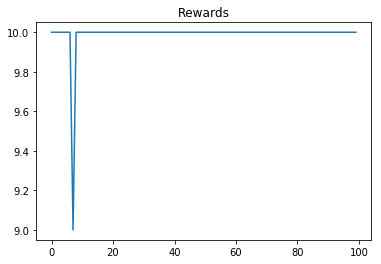

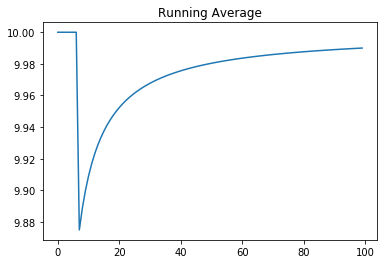

In [11]:
# https://deeplearningcourses.com/c/deep-reinforcement-learning-in-python
# https://www.udemy.com/deep-reinforcement-learning-in-python
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
#       if builtins is not defined
# sudo pip install -U future

import gym
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gym import wrappers
from datetime import datetime


# turns list of integers into an int
# Ex.
# build_state([1,2,3,4,5]) -> 12345
def build_state(features):
  return int("".join(map(lambda feature: str(int(feature)), features)))

def to_bin(value, bins):
  return np.digitize(x=[value], bins=bins)[0]


class FeatureTransformer:
  def __init__(self):
    # Note: to make this better you could look at how often each bin was
    # actually used while running the script.
    # It's not clear from the high/low values nor sample() what values
    # we really expect to get.
    self.cart_position_bins = np.linspace(-2.4, 2.4, 9)
    self.cart_velocity_bins = np.linspace(-2, 2, 9) # (-inf, inf) (I did not check that these were good values)
    self.pole_angle_bins = np.linspace(-0.4, 0.4, 9)
    self.pole_velocity_bins = np.linspace(-3.5, 3.5, 9) # (-inf, inf) (I did not check that these were good values)

  def transform(self, observation):
    # returns an int
    cart_pos, cart_vel, pole_angle, pole_vel = observation
    return build_state([
      to_bin(cart_pos, self.cart_position_bins),
      to_bin(cart_vel, self.cart_velocity_bins),
      to_bin(pole_angle, self.pole_angle_bins),
      to_bin(pole_vel, self.pole_velocity_bins),
    ])


class Model:
  def __init__(self, env, feature_transformer):
    self.env = env
    self.feature_transformer = feature_transformer
    print("env.observation_space.shape[0] {}".format(env.observation_space.shape[0]))
    num_states = 10**env.observation_space.shape[0]
    num_actions = env.action_space.n
    self.Q = np.random.uniform(low=-1, high=1, size=(num_states, num_actions))

  def predict(self, s):
    x = self.feature_transformer.transform(s)
    print("predict x {}".format(x))
    return self.Q[x]

  def update(self, s, a, G):
    x = self.feature_transformer.transform(s)
    self.Q[x,a] += 1e-2*(G - self.Q[x,a])

  def sample_action(self, s, eps):
    if np.random.random() < eps:
      return self.env.action_space.sample()
    else:
      p = self.predict(s)
      return np.argmax(p)


def play_one(model, eps, gamma):
  observation = env.reset()
  done = False
  totalreward = 0
  iters = 0
  while not done and iters < 10:#10000:
    action = model.sample_action(observation, eps)
    prev_observation = observation
    observation, reward, done, info = env.step(action)

    totalreward += reward

    if done and iters < 199:
      reward = -300

    # update the model
    G = reward + gamma*np.max(model.predict(observation))
    model.update(prev_observation, action, G)

    iters += 1

  return totalreward


def plot_running_avg(totalrewards):
  N = len(totalrewards)
  running_avg = np.empty(N)
  for t in range(N):
    running_avg[t] = totalrewards[max(0, t-100):(t+1)].mean()
  plt.plot(running_avg)
  plt.title("Running Average")
  plt.show()


if __name__ == '__main__':
  env = gym.make('CartPole-v0')
  ft = FeatureTransformer()
  model = Model(env, ft)
  gamma = 0.9

  if 'monitor' in sys.argv:
    filename = os.path.basename(__file__).split('.')[0]
    monitor_dir = './' + filename + '_' + str(datetime.now())
    env = wrappers.Monitor(env, monitor_dir)

  N = 100#10000
  totalrewards = np.empty(N)
  for n in range(N):
    eps = 1.0/np.sqrt(n+1)
    totalreward = play_one(model, eps, gamma)
    totalrewards[n] = totalreward
    if n % 100 == 0:
      print("episode:", n, "total reward:", totalreward, "eps:", eps)
  print("avg reward for last 100 episodes:", totalrewards[-100:].mean())
  print("total steps:", totalrewards.sum())

  plt.plot(totalrewards)
  plt.title("Rewards")
  plt.show()

  plot_running_avg(totalrewards)


In [9]:
model.Q.shape
model.Q

array([[-0.62752321,  0.20833587],
       [-0.31446745,  0.24937245],
       [ 0.82065179,  0.40101559],
       ...,
       [ 0.96829641,  0.41341637],
       [ 0.24372011, -0.94968371],
       [ 0.31083868, -0.71684932]])

## TD lambda

### N-step methods

- Value Function  
$V_{\pi}(s) = \sum_{a}^{}\pi(a|s)\sum_{s'}^{}\sum_{r}^{}p(s',r|s,a)(r+\gamma V_{\pi}(s'))$   
$V(s) = E[G(t)|S(t)=s]\approx \frac{1}{N}\sum_{N}^{i=1}G_{i,s}$




- TD(0)

$G_{s} \approx r+\gamma V(s')$


- N-Step 

$G_{t}^{n} = R(t+1)+\gamma R(t+2)+...+\gamma^{n -1} R(t+n)+\gamma^{n}V(s(t+n))$

$\text{Tabular}$ : $V(s(t)) = V(s(t)) +\alpha (G^{n}(t)-V(s(t))$  
$\text{Function Approx}$ : $\theta = \theta+\alpha (G^{n}(t)-V(s(t))\frac{\partial V(s(t))}{\partial \theta}$


- Control

'use Q instead of V'  

$G^{n}(t) = R(t+1)+ \gamma R(t+2) + ... + \gamma^{n-1}R(t+n) +\gamma^{n}Q(s_{t+n},a_{t+n})$  
$\theta = \theta+\alpha (G^{n}(t)-Q(s_{t},s_{a}))\frac{\partial Q(s_{t},s_{a})}{\partial \theta}$  
$a_{t} = argmax_{a}Q(s_{t},a)$

### N-step code

```python
if __name__ == '__main__':
  env = gym.make('MountainCar-v0')
  ft = FeatureTransformer(env)
  model = Model(env, ft, "constant")
  gamma = 0.99

  N = 300
  totalrewards = np.empty(N)
  costs = np.empty(N)
  for n in range(N):
    # eps = 1.0/(0.1*n+1)
    eps = 0.1*(0.97**n)
    totalreward = play_one(model, eps, gamma)
    totalrewards[n] = totalreward
    print("episode:", n, "total reward:", totalreward)
  print("avg reward for last 100 episodes:", totalrewards[-100:].mean())
  print("total steps:", -totalrewards.sum())


```

```python
def play_one(model, eps, gamma, n=5):
  observation = env.reset()
  done = False
  totalreward = 0
  rewards = []
  states = []
  actions = []
  iters = 0
  # array of [gamma^0, gamma^1, ..., gamma^(n-1)]
  multiplier = np.array([gamma]*n)**np.arange(n)
  # while not done and iters < 200:
  while not done and iters < 10000:
    # in earlier versions of gym, episode doesn't automatically
    # end when you hit 200 steps
    action = model.sample_action(observation, eps)

    states.append(observation)
    actions.append(action)

    prev_observation = observation
    observation, reward, done, info = env.step(action)

    rewards.append(reward)

    # update the model
    if len(rewards) >= n:
      # return_up_to_prediction = calculate_return_before_prediction(rewards, gamma)
      return_up_to_prediction = multiplier.dot(rewards[-n:])
      G = return_up_to_prediction + (gamma**n)*np.max(model.predict(observation)[0])
      model.update(states[-n], actions[-n], G)

    # if len(rewards) > n:
    #   rewards.pop(0)
    #   states.pop(0)
    #   actions.pop(0)
    # assert(len(rewards) <= n)

    totalreward += reward
    iters += 1

  # empty the cache
  if n == 1:
    rewards = []
    states = []
    actions = []
  else:
    rewards = rewards[-n+1:]
    states = states[-n+1:]
    actions = actions[-n+1:]
  # unfortunately, new version of gym cuts you off at 200 steps
  # even if you haven't reached the goal.
  # it's not good to do this UNLESS you've reached the goal.
  # we are "really done" if position >= 0.5
  if observation[0] >= 0.5:
    # we actually made it to the goal
    # print("made it!")
    while len(rewards) > 0:
      G = multiplier[:len(rewards)].dot(rewards)
      model.update(states[0], actions[0], G)
      rewards.pop(0)
      states.pop(0)
      actions.pop(0)
  else:
    # we did not make it to the goal
    # print("didn't make it...")
    while len(rewards) > 0:
      guess_rewards = rewards + [-1]*(n - len(rewards))
      G = multiplier.dot(guess_rewards)
      model.update(states[0], actions[0], G)
      rewards.pop(0)
      states.pop(0)
      actions.pop(0)

  return totalreward

```

```python
class SGDRegressor:
  def __init__(self, **kwargs):
    self.w = None
    self.lr = 1e-2
  'Update weight' 
  def partial_fit(self, X, Y):
    if self.w is None:
      D = X.shape[1]
      self.w = np.random.randn(D) / np.sqrt(D)
    self.w += self.lr*(Y - X.dot(self.w)).dot(X)

  def predict(self, X):
    return X.dot(self.w)
```

### TD Lambda

- generalized N-step method
- $TD(\lambda)$ allow us a more elegant method to trade-off between TD(0) and MC
- $\lambda$ = 0 gives us TD(0), $\lambda$ =1 gives us MC

- $TD(\lambda)$ 

$\lambda_{1}G^{(1)}(t)$ + $\lambda_{2}G^{(2)}(t)$ + ...+ $\lambda_{n}G^{(n)}(t)$, $\sum_{i=1}^{n}\lambda_{i}=1$

$G^{n}(t) = R(t+1)+ \gamma R(t+2) + ... + \gamma^{n-1}R(t+n) +\gamma^{n}Q(s_{t+n},a_{t+n})$  


$G_{\lambda}(t) = (1-\lambda)\sum_{n=1}^{\infty}\lambda^{n-1}G^{n}(t)$ 

- we assume our episode will end at some point(time step T)

$G_{\lambda}(t) = (1-\lambda)\sum_{n=1}^{T-t-1}\lambda^{n-1}G^{n}(t)$ + $(1-\lambda)\sum_{n=T-t}^{\infty}\lambda^{n-1}G(t)$

- manipulate 2nd term to simplify the sum

$G_{\lambda}(t) = (1-\lambda)\sum_{n=1}^{T-t-1}\lambda^{n-1}G^{n}(t)$ + $(1-\lambda)G(t)\lambda^{-1}\sum_{n=T-t}^{\infty}\lambda^{n}$

$G_{\lambda}(t) = (1-\lambda)\sum_{n=1}^{T-t-1}\lambda^{n-1}G^{n}(t)$ + $\lambda^{T-t-1}G(t)$

- The algorithm we're going to learn is an approximation to calculating the true $\lambda$ return

- TD(0)

$\text{TD target}: R_{t+1}+\gamma V(s_{t+1})$  
$\text{prediction}: V(s_{t})$  
$\text{difference,TD error}: \delta_{t} =  R_{t+1}+\gamma V(s_{t+1}) - V(s_{t})$  
$\text{parameter update}:\theta_{t+1} = \theta_{t}+ \alpha \delta_{t} \nabla_{\theta}V(s_{t}) $

- Eligibility Trace
    - Eligibility trace/ vector keeps track of old gradients,

$e_{0} = 0$, $e_{t} = \nabla_{\theta}V(s_{t})+\gamma \lambda e_{t-1}$

- redefine 

$\text{parameter update}:\theta_{t+1} = \theta_{t}+ \alpha \delta_{t} e_{t} $

- recall the momemtum works

$v_{0} = 0$, $v_{t} = \nabla_{\theta}J+\mu v_{t-1}$  
$\theta_{t+1} = \theta_{t}+ \alpha v_{t}$

- Final thoughts

    - N-step method and true $\lambda$ return requires for future rewards
        - forward view
    - TD($\lambda$) , we update the current param based on past errors
        - backward view
        

### TD lambda code

```python

import gym
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from gym import wrappers
from datetime import datetime

# code we already wrote
from q_learning import plot_cost_to_go, FeatureTransformer, plot_running_avg


class BaseModel:
  def __init__(self, D):
    self.w = np.random.randn(D) / np.sqrt(D)

  def partial_fit(self, input_, target, eligibility, lr=1e-2):
    self.w += lr*(target - input_.dot(self.w))*eligibility

  def predict(self, X):
    X = np.array(X)
    return X.dot(self.w)

# Holds one BaseModel for each action
class Model:
  def __init__(self, env, feature_transformer):
    self.env = env
    self.models = []
    self.feature_transformer = feature_transformer

    D = feature_transformer.dimensions
    self.eligibilities = np.zeros((env.action_space.n, D))
    for i in range(env.action_space.n):
      model = BaseModel(D)
      self.models.append(model)

  def predict(self, s):
    X = self.feature_transformer.transform([s])
    assert(len(X.shape) == 2)
    result = np.stack([m.predict(X) for m in self.models]).T
    assert(len(result.shape) == 2)
    return result

  def update(self, s, a, G, gamma, lambda_):
    X = self.feature_transformer.transform([s])
    assert(len(X.shape) == 2)
    self.eligibilities *= gamma*lambda_
    'X[0] feature vector : gradient '
    self.eligibilities[a] += X[0]
    self.models[a].partial_fit(X[0], G, self.eligibilities[a])

  def sample_action(self, s, eps):
    if np.random.random() < eps:
      return self.env.action_space.sample()
    else:
      return np.argmax(self.predict(s))




```

```python
# returns a list of states_and_rewards, and the total reward
def play_one(model, env, eps, gamma, lambda_):
  observation = env.reset()
  done = False
  totalreward = 0
  iters = 0
  # while not done and iters < 200:
  while not done and iters < 10000:
    action = model.sample_action(observation, eps)
    prev_observation = observation
    observation, reward, done, info = env.step(action)

    # update the model
    next = model.predict(observation)
    assert(next.shape == (1, env.action_space.n))
    G = reward + gamma*np.max(next[0])
    model.update(prev_observation, action, G, gamma, lambda_)

    totalreward += reward
    iters += 1

  return totalreward


if __name__ == '__main__':
  env = gym.make('MountainCar-v0')
  ft = FeatureTransformer(env)
  model = Model(env, ft)
  gamma = 0.9999
  lambda_ = 0.7


  N = 300
  totalrewards = np.empty(N)
  costs = np.empty(N)
  for n in range(N):
    # eps = 1.0/(0.1*n+1)
    eps = 0.1*(0.97**n)
    # eps = 0.5/np.sqrt(n+1)
    totalreward = play_one(model, env, eps, gamma, lambda_)
    totalrewards[n] = totalreward
    print("episode:", n, "total reward:", totalreward)
  print("avg reward for last 100 episodes:", totalrewards[-100:].mean())
  print("total steps:", -totalrewards.sum())



```

### RBF network + SGD regressor

![](https://chrisjmccormick.files.wordpress.com/2013/08/architecture_simple2.png)

## Policy Gradient

### policy gradient methods

- softmax to turn the scores into probabilities that sum to 1  

$\pi(a_{j}|s) = \frac{exp(score_{j})}{\sum_{j'}^{}exp(score_{j'})}$

- parameterize the policy and the value function

$\text{Policy}$: $\pi(a|s,\theta_{p})$ = $f(s;\theta_{p})$  
$\text{Value function approximation}$: $\hat{V}_{\pi}(s)$ = $f(s;\theta_{v})$  

### Policy Gradient Theorem

$\nabla \eta(\theta_{p})$ = E[$\sum_{a}^{}Q_{\pi}(s,a)\nabla_{\theta_{p}}\pi(a|s,\theta_{p})$]

$\nabla \eta(\theta_{p})$ = E[$G\nabla_{\theta_{p}}log\pi(a|s,\theta_{p})$]

- this is gradient ascent
- we want to maximize the performance

- batches  

$\nabla \eta(\theta_{p})$ $\approx$ $ \frac{1}{T}\sum_{t=1}^{T}G_{t}\nabla_{\theta_{p}}log\pi(a|s,\theta_{p})$

- G is constance 

$\nabla \eta(\theta_{p})$ $\approx$ $ \frac{1}{T}\sum_{t=1}^{T}\nabla_{\theta_{p}}G_{t}log\pi(a|s,\theta_{p})$

$\nabla \eta(\theta_{p})$ $\approx$ $ \frac{1}{T}\nabla_{\theta_{p}}\sum_{t=1}^{T}G_{t}log\pi(a|s,\theta_{p})$

- minimize, 1/T is meaningless

$\nabla \eta(\theta_{p})$ $\approx$ $ -\sum_{t=1}^{T}G_{t}log\pi(a|s,\theta_{p})$

$\theta_{P,t+1} = \theta_{P,t}+\alpha G_{t}\frac{\nabla \pi(a_{t}|s_{t})}{\pi(a_{t}|s_{t})}$  
$\theta_{P,t+1} = \theta_{P,t}+\alpha G_{t}\nabla log\pi(a_{t}|s_{t})$

- V(s)
- V(s) is baseline  

maximize: $\sum_{t=1}^{T}(G_{t}-V(s_{t})log\pi(a_{t}|s_{t},\theta_{p})$  

- G- V(s) is advantage

$\theta_{V,t+1} = \theta_{V,t}+\alpha (G_{t}-V_{t})\nabla V_{t}$

### with TD 

- can this be converted to a TD method? yes
- called actor-critic method
- policy is actor
- value critic

$\theta_{P,t+1} = \theta_{P,t}+\alpha (r_{t+1}+\gamma V(s_{t+1}) - V(s_{t}))\nabla log\pi(a_{t}|s_{t})$  
$\theta_{V,t+1} = \theta_{V,t}+\alpha (r_{t+1}+\gamma V(s_{t+1})-V(s_{t}))\nabla V_{t}$

```python
def main():
  env = gym.make('MountainCarContinuous-v0')
  ft = FeatureTransformer(env, n_components=100)
  D = ft.dimensions
  pmodel = PolicyModel(D, ft, [])
  vmodel = ValueModel(D, ft, [])
  init = tf.global_variables_initializer()
  session = tf.InteractiveSession()
  session.run(init)
  pmodel.set_session(session)
  vmodel.set_session(session)
  gamma = 0.95

  N = 50
  totalrewards = np.empty(N)
  costs = np.empty(N)
  for n in range(N):
    totalreward, num_steps = play_one_td(env, pmodel, vmodel, gamma)
    totalrewards[n] = totalreward
```

### Continuous , Discrete Action

- Continuous 
- 'Gaussian distribution : mean and variance'



### Policy Gradient Code

- #### Continuous Actions   

```python

# approximates pi(a | s)
class PolicyModel:
  def __init__(self, ft, D, hidden_layer_sizes_mean=[], hidden_layer_sizes_var=[]):
  'D is state dimension, latent vector size'
  
  # mean final layer
  ...
  M1 = D
  layer = HiddenLayer(M1, 1, lambda x: x, use_bias=False, zeros=True)
  self.mean_layers.append(layer)
  ...
  ##### model the variance #####
  self.var_layers = []
  'activation function is softplus'
  # variance final layer
  ...
  layer = HiddenLayer(M1, 1, tf.nn.softplus, use_bias=False, zeros=False)
  self.var_layers.append(layer)
  
  # gather params
  self.params = []
  for layer in (self.mean_layers + self.var_layers):
    self.params += layer.params
    
  # inputs and targets
  self.X = tf.placeholder(tf.float32, shape=(None, D), name='X')
  'predicted action from PolicyModel : self.predict_op'
  self.actions = tf.placeholder(tf.float32, shape=(None,), name='actions')
  self.advantages = tf.placeholder(tf.float32, shape=(None,), name='advantages')
  
  # calculate output and cost
  mean = get_output(self.mean_layers)
  std = get_output(self.var_layers) + 1e-4 # smoothing

  # note: the 'variance' is actually standard deviation
  norm = tf.contrib.distributions.Normal(mean, std)
  self.predict_op = tf.clip_by_value(norm.sample(), -1, 1)

  log_probs = norm.log_prob(self.actions)
  cost = -tf.reduce_sum(self.advantages * log_probs + 0.1*norm.entropy())
  self.train_op = tf.train.AdamOptimizer(1e-3).minimize(cost)  
  
```
$$ \bbox[yellow]
{
\nabla \eta(\theta_{p}) \approx  -\sum_{t=1}^{T}G_{t}log\pi(a|s,\theta_{p}) \\
\theta_{P,t+1} = \theta_{P,t}+\alpha G_{t}\frac{\nabla \pi(a_{t}|s_{t})}{\pi(a_{t}|s_{t})}  \\
\theta_{P,t+1} = \theta_{P,t}+\alpha G_{t}\nabla log\pi(a_{t}|s_{t}) \\
}
$$

```python
'update weights '
def partial_fit(self, X, actions, advantages):
    X = np.atleast_2d(X)
    X = self.ft.transform(X)
    
    actions = np.atleast_1d(actions)
    advantages = np.atleast_1d(advantages)
    self.session.run(
      self.train_op,
      feed_dict={
        self.X: X,
        self.actions: actions,
        self.advantages: advantages,
      }
    )
```    

```python
# approximates V(s)
class ValueModel:
  def __init__(self, D, ft, hidden_layer_sizes=[]):
    self.ft = ft
    self.costs = []

    # create the graph
    self.layers = []
    M1 = D
    for M2 in hidden_layer_sizes:
      layer = HiddenLayer(M1, M2)
      self.layers.append(layer)
      M1 = M2

    # final layer
    layer = HiddenLayer(M1, 1, lambda x: x)
    self.layers.append(layer)

    # inputs and targets
    self.X = tf.placeholder(tf.float32, shape=(None, D), name='X')
    self.Y = tf.placeholder(tf.float32, shape=(None,), name='Y')

    # calculate output and cost
    Z = self.X
    for layer in self.layers:
      Z = layer.forward(Z)
    Y_hat = tf.reshape(Z, [-1]) # the output
    self.predict_op = Y_hat

    cost = tf.reduce_sum(tf.square(self.Y - Y_hat))
    self.cost = cost
    self.train_op = tf.train.AdamOptimizer(1e-1).minimize(cost)
```    

$$ \bbox[yellow]
{
maximize: \sum_{t=1}^{T}(G_{t}-V(s_{t})log\pi(a_{t}|s_{t},\theta_{p})  \\
\theta_{V,t+1} = \theta_{V,t}+\alpha (G_{t}-V_{t})\nabla V_{t}
}
$$

```python
V_next = vmodel.predict(observation)
G = reward + gamma*V_next
advantage = G - vmodel.predict(prev_observation)
pmodel.partial_fit(prev_observation, action, advantage)
vmodel.partial_fit(prev_observation, G)
```

- #### Discrete Actions

```python
# approximates pi(a | s)
class PolicyModel:
  def __init__(self, D, K, hidden_layer_sizes):
    "p_a_given_s is final layer's output "
    self.predict_op = p_a_given_s

    '# K = number of actions'
    # self.one_hot_actions = tf.one_hot(self.actions, K)
    selected_probs = tf.log(
      tf.reduce_sum(
        p_a_given_s * tf.one_hot(self.actions, K),
        reduction_indices=[1]
      )
    )

    # self.selected_probs = selected_probs
    cost = -tf.reduce_sum(self.advantages * selected_probs)
    self.train_op = tf.train.AdagradOptimizer(1e-1).minimize(cost)

```



### PG Summary

- Discrete Actions: softmax
- Continuous Actions: Gaussian or any other continuous distribution

## Deep Q-Learning

$\theta = \theta + \alpha(r+ \gamma max_{a'}Q'(s',a') - Q(s,a))\nabla_{\theta}Q(s,a)$  

- x = feature_expansion(s)
- each output node corresponds to a difference action a
- `Experience Memory(replay buffer)` : correlation removed
- sample a random batch from the buffer, do gradient descent
- buffer is a queue:FIFO

- `DQN, dual network, target network`
- to remove instability of deep Q network because Q'(s',a') is approximation network

- `Dealing with Images`
- state(t) = [image(t-3),image(t-2),image(t-1),image(t)]
- stack 4 frames: (4, H,W,C)
- convert to grayscale: (4, H,W)


### DQN code

- `cost function`
```python
class DQN:
    self.predict_op = Y_hat

    selected_action_values = tf.reduce_sum(
      Y_hat * tf.one_hot(self.actions, K),
      reduction_indices=[1]
    )

    cost = tf.reduce_sum(tf.square(self.G - selected_action_values))
    self.train_op = tf.train.AdamOptimizer(1e-2).minimize(cost)
```
$$ \bbox[yellow]
{
G = r+ \gamma max_{a'}Q'(s',a')
}
$$

- `train`

```python
while not done and iters < 2000:
    # if we reach 2000, just quit, don't want this going forever
    # the 200 limit seems a bit early
    action = model.sample_action(observation, eps)
    prev_observation = observation
    observation, reward, done, info = env.step(action)

    totalreward += reward
    if done:
      reward = -200

    # update the model
    "add s,a,s',r into replay buffer"
    model.add_experience(prev_observation, action, reward, observation, done)
    "targets = [r + self.gamma*next_q if not done else r for r, next_q, done in zip(rewards, next_Q, dones)]"
    "calculate G,and run train_op"
    model.train(tmodel)

    iters += 1

    if iters % copy_period == 0:
      tmodel.copy_from(model)
```